In [1]:
%matplotlib notebook

In [2]:
# Import Dependencies 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Save state clean data as a variable to be read 
state_clean_data = "Data_JWang/state_clean_data.csv"

In [4]:
# Read our Data file with the pandas library
state_clean_data = pd.read_csv(state_clean_data)
state_clean_data.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Uninsured_Num,Uninsured_Den,Uninsured_Perc,Uninsured_Adults_Num,Uninsured_Adults_Den,Uninsured_Adults_Perc,...,Drugs_Overdose_Death_Den,Homicides_Perc,Premature_Deaths_Num,Premature_Deaths_Den,Firearms_Fatalities_Perc,Life_Expectancy_Raw,Low_Birth_Weight_Num,Low_Birth_Weight_Den,Drugs_Overdose_Deaths_Perc,Preventable_Hospital_Stays_Raw
0,AK,51956.0,725572.0,0.071607,201574.0,1299028.0,0.155173,163858.0,929122.0,0.176358,...,3995795.0,0.000186,16598.0,4269456.0,0.003888,2026.160114,9168.0,155451.0,0.058977,51269.0
1,AL,190684.0,4336896.0,0.043968,855944.0,7946156.0,0.107718,802088.0,5791254.0,0.138500,...,27416637.0,0.000165,160880.0,27273632.0,0.005899,5075.180408,83790.0,825884.0,0.101455,396551.0
2,AR,99670.0,2708544.0,0.036798,456684.0,4855014.0,0.094064,403944.0,3474804.0,0.116249,...,15808357.0,0.000143,95680.0,16718408.0,0.005723,5688.222428,47988.0,535980.0,0.089533,416925.0
3,AZ,322628.0,6625442.0,0.048695,1339638.0,11226354.0,0.119330,1104656.0,8018912.0,0.137756,...,41522215.0,0.000202,156792.0,38639850.0,0.004058,1259.244082,84784.0,1191676.0,0.071147,51932.0
4,CA,1837766.0,38623920.0,0.047581,5574610.0,66523356.0,0.083799,5053256.0,48571872.0,0.104037,...,235691015.0,0.000120,687182.0,222305892.0,0.003091,4647.506674,469061.0,6909720.0,0.067884,190869.0


In [5]:
health_outcomes_data = state_clean_data [['State',
                                          'Unemployment_Num',
                                          'Unemployment_Den',
                                          'Unemployment_Perc',
                                          'Diabetes_Prevalence_Num',
                                          'Diabetes_Prevalence_Den',
                                          'Diabetes_Prevalence_Perc',
                                          'HIV_Prevalence_Num',
                                          'HIV_Prevalence_Den',
                                          'HIV_Prevalence_Perc'
                                         ]]


# health_outcomes_data["Frequent_Physical_Distress_Raw"] = health_outcomes_data["Frequent_Physical_Distress_Raw"].map("{:.2f}".format)
# health_outcomes_data["Frequent_Mental_Distress_Raw"] = health_outcomes_data["Frequent_Mental_Distress_Raw"].map("{:.2f}".format)
# health_outcomes_data["Diabetes_Prevalence_Perc"] = health_outcomes_data["Diabetes_Prevalence_Perc"].map("{:.2%}".format)
# health_outcomes_data["HIV_Prevalence_Perc"] = health_outcomes_data["HIV_Prevalence_Perc"].map("{:.2%}".format)


health_outcomes_data.head()

,State,Unemployment_Num,Unemployment_Den,Unemployment_Perc,Diabetes_Prevalence_Num,Diabetes_Prevalence_Den,Diabetes_Prevalence_Perc,HIV_Prevalence_Num,HIV_Prevalence_Den,HIV_Prevalence_Perc
0,AK,51956.0,725572.0,0.071607,81062.0,1.063955e+06,0.076189,1235.0,1126303.0,0.001097
1,AL,190684.0,4336896.0,0.043968,1010874.0,7.257881e+06,0.139279,24458.0,8145014.0,0.003003
2,AR,99670.0,2708544.0,0.036798,585278.0,4.389497e+06,0.133336,10499.0,4920366.0,0.002134
3,AZ,322628.0,6625442.0,0.048695,978342.0,1.002127e+07,0.097627,30367.0,11305039.0,0.002686
4,CA,1837766.0,38623920.0,0.047581,4908040.0,5.775035e+07,0.084987,238654.0,64838003.0,0.003681


In [6]:
unemp_prem_corr = health_outcomes_data.corr().loc['Diabetes_Prevalence_Perc','Unemployment_Perc']
unemp_prem_corr

0.19049788077182817

In [7]:
unemp_prem_corr = health_outcomes_data.corr().loc['HIV_Prevalence_Perc','Unemployment_Perc']
unemp_prem_corr

0.3848561005115613

In [8]:
# Filter the DataFrame down only to those columns to chart
health_outcomes = health_outcomes_data[["State",'Diabetes_Prevalence_Perc','HIV_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
health_outcomes_state = health_outcomes.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

health_outcomes_state_sort = health_outcomes_state.sort_values(by=['Diabetes_Prevalence_Perc'], ascending=True)

health_outcomes_state_sort.head()

,Diabetes_Prevalence_Perc,HIV_Prevalence_Perc
State,,
CO,0.062227,0.002530
UT,0.071896,0.001166
AK,0.076189,0.001097
MN,0.081692,0.001731
DC,0.082000,0.025902


In [9]:
# Filter the DataFrame down only to those columns to chart
Unemployment_Diabetes_Prevalence = health_outcomes_data[["State",'Unemployment_Perc','Diabetes_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
Unemployment_Diabetes_Prevalence = Unemployment_Diabetes_Prevalence.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

Unemployment_Diabetes_Prevalence_sort = Unemployment_Diabetes_Prevalence.sort_values(by=['Unemployment_Perc'], ascending=True)

Unemployment_Diabetes_Prevalence_sort.head()

,Unemployment_Perc,Diabetes_Prevalence_Perc
State,,
HI,0.023602,0.098305
ND,0.026040,0.084955
NH,0.026714,0.093086
CO,0.028352,0.062227
NE,0.029366,0.089795


<IPython.core.display.Javascript object>


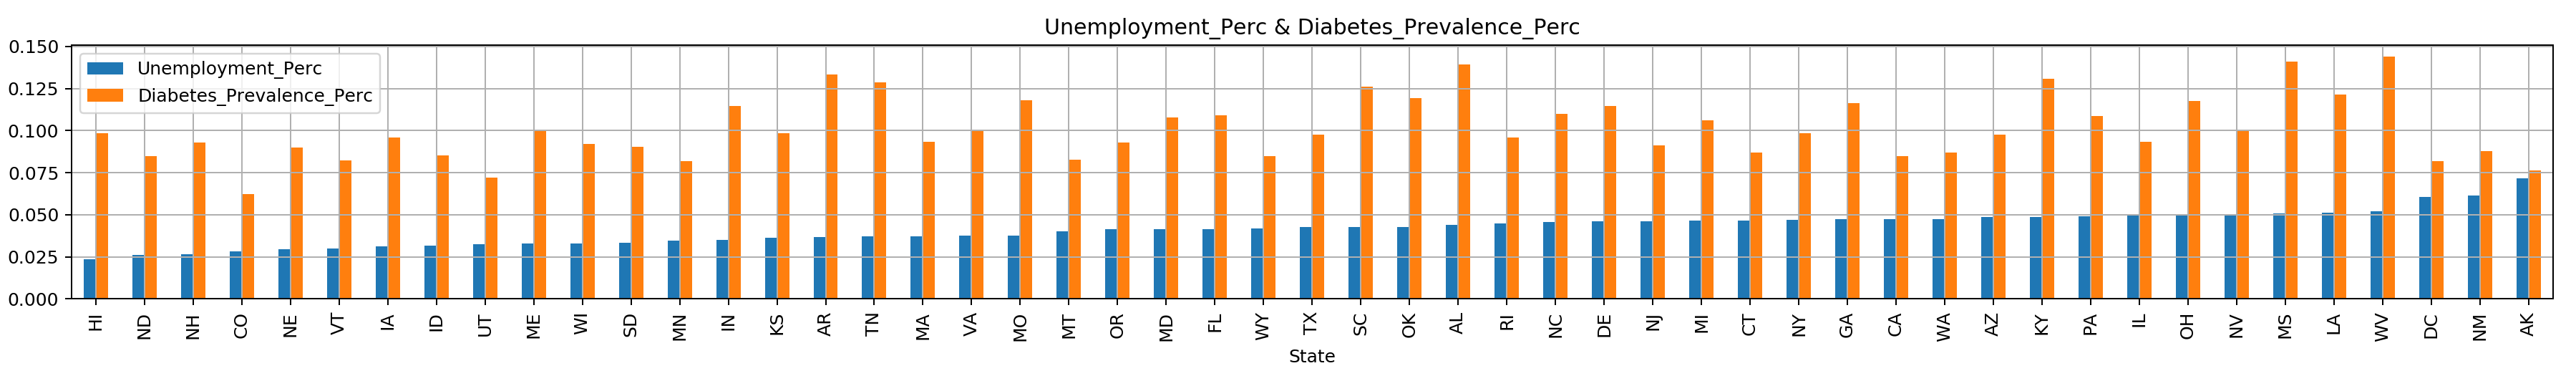

In [10]:
# Use DataFrame.plot() in order to create a bar chart of the data
Unemployment_Diabetes_Prevalence_sort.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Unemployment_Perc & Diabetes_Prevalence_Perc")

# Set a grid on the plot
plt.grid()

plt.show()
plt.tight_layout()

In [11]:
plt.savefig("Images_JWang/Unemployment_Perc & Diabetes_Prevalence_Perc")

In [12]:
# Filter the DataFrame down only to those columns to chart
Unemployment_HIV_Prevalence = health_outcomes_data[["State",'Unemployment_Perc','HIV_Prevalence_Perc']]

# Set the index to be "State" so they will be used as labels
Unemployment_HIV_Prevalence = Unemployment_HIV_Prevalence.set_index("State")

# health_outcomes1=health_outcomes1.astype(float)

Unemployment_HIV_Prevalence_sort = Unemployment_HIV_Prevalence.sort_values(by=['Unemployment_Perc'], ascending=True)

Unemployment_HIV_Prevalence_sort.head()

,Unemployment_Perc,HIV_Prevalence_Perc
State,,
HI,0.023602,0.002255
ND,0.026040,0.000571
NH,0.026714,0.001065
CO,0.028352,0.002530
NE,0.029366,0.001028


<IPython.core.display.Javascript object>


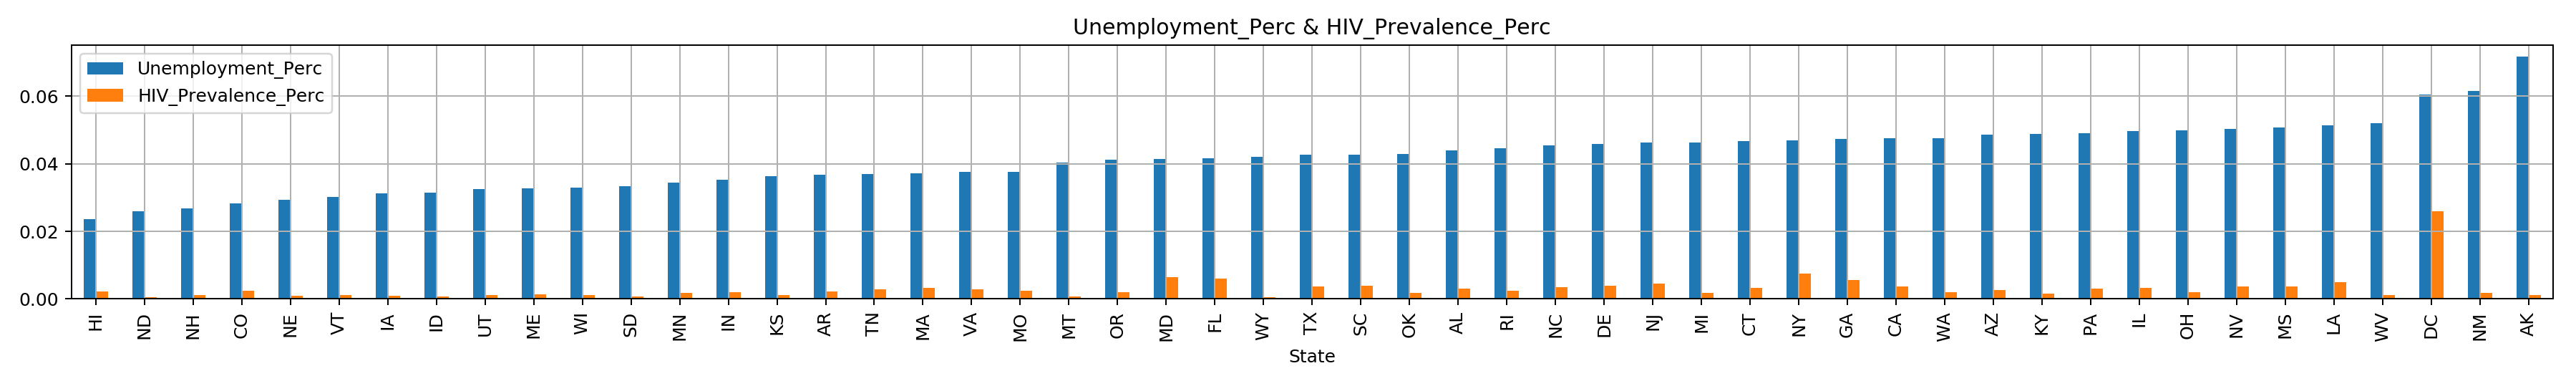

In [13]:
# Use DataFrame.plot() in order to create a bar chart of the data
Unemployment_HIV_Prevalence_sort.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Unemployment_Perc & HIV_Prevalence_Perc")

# Set a grid on the plot
plt.grid()

plt.show()
plt.tight_layout()

In [14]:
plt.savefig("Images_JWang/Unemployment_Perc & HIV_Prevalence_Perc")